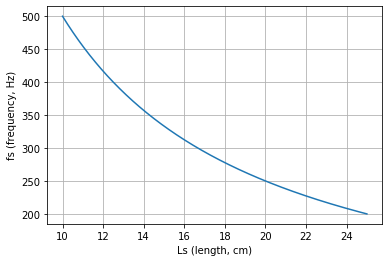

In [1]:
# [1].1

# 當 length (L) 等速度漸增時，
# freqency (f) 以 1/L 的型式 漸減。
# 以下程式碼畫出，f vs L 的函數圖形。

import numpy as np
import matplotlib.pyplot as pl


L0, L1=  10, 25  # cm
t0, t1=   0,  1  # sec

ts= np.linspace(t0, t1, 1001)

m=  (L1-L0)/(t1-t0)  # slope, speed
Ls= m * ts + L0

k=  5000 # 一個比例常數(Hz.cm)， 
fs= k *  1/Ls  # Hz

pl.plot(Ls,fs)

pl.xlabel('Ls (length, cm)')
pl.ylabel('fs (frequency, Hz)')
pl.grid()

In [2]:
# [1].2

import thinkdsp as td
class RyTrombone(td.Chirp):
    def evaluate(self, ts):
        L0, L1=  1.0/self.start, 1.0/self.end
        Ls=      np.linspace(L0, L1, len(ts)-1)
        freqs=   1/Ls
        return self._evaluate(ts, freqs)

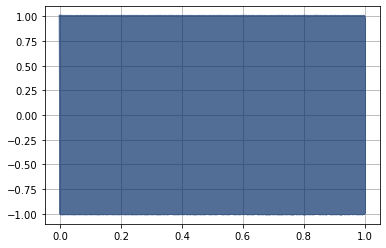

In [3]:
# [1].3
w= RyTrombone(start= 220, end= 440).make_wave()

w.plot()
w.make_audio()

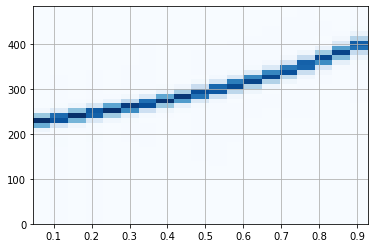

In [4]:
# [1].4
w.make_spectrogram(1024).plot(high=500)

In [5]:
# [1]..... 以下 僅是好玩....
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]

A大調音階= [A,B,C1,D,E,F1,G1,a]

song= A大調音階
s= RyTrombone(song[0],song[0]).make_wave(.5)
for x in song[1:]:
    s= (s|RyTrombone(x,x).make_wave(.5))
s.make_audio()

In [6]:
小星星= [
    A,A,E,E,F1,F1,E,E,
    D,D,C1,C1,B,B,A,A,
    E,E,D,D,C1,C1,B,B,
    E,E,D,D,C1,C1,B,B,
    A,A,E,E,F1,F1,E,E,
    D,D,C1,C1,B,B,A,A
    ]
      
song= 小星星
s= RyTrombone(song[0],song[0]).make_wave(.5)
for x in song[1:]:
    s= (s|RyTrombone(x,x).make_wave(.5))
s.make_audio()

In [7]:
# [2].1

import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x.ys.shape

(10000,)

(3.8493507643164655, 0.0010009233278425605, 1.0021661852480979)

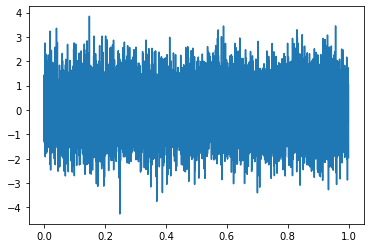

In [8]:
#[2].2
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)
x.ys.max(),  \
x.ys.mean(), \
x.ys.std()

(5001,)

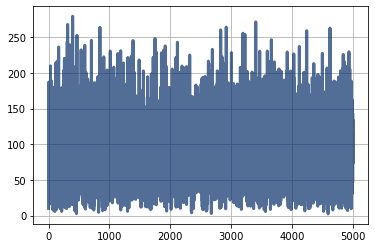

In [9]:
#[2].3

sx= x.make_spectrum()
sx.plot()
sx.hs.shape

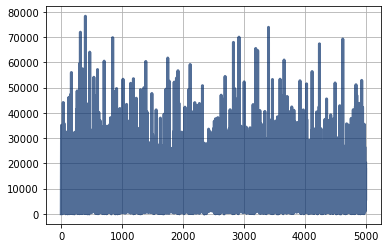

In [10]:
#[2].3
sx.plot_power()

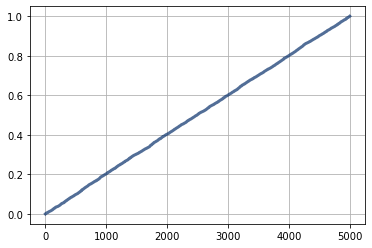

In [11]:
#[2].4
Sx= sx.make_integrated_spectrum()
Sx.plot_power()

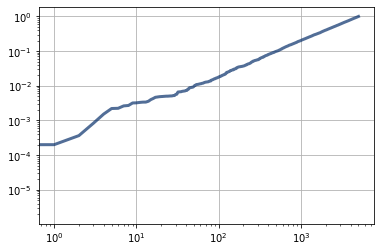

In [12]:
#[2].5
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [13]:
#[2].6
Sx.estimate_slope().slope

1.0003883085648184

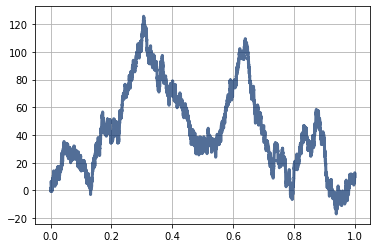

In [14]:
#[2].7
y= x.cumsum()
y.plot()

In [15]:
#[2].8
Sy= y.make_spectrum().make_integrated_spectrum()
Sy.estimate_slope().slope

0.0007300539792500638

0.0031996137471316313

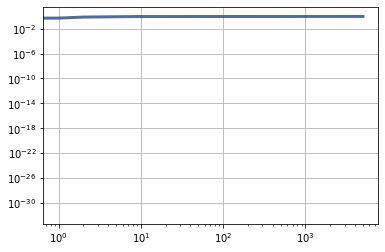

In [16]:
#[2].9
z= td.BrownianNoise().make_wave(
    duration=1, framerate=10000)

Sz= z.make_spectrum().make_integrated_spectrum()

Sz.plot_power()
pl.xscale('log')
pl.yscale('log')

Sz.estimate_slope().slope

In [17]:
#[2].10
#
# Sz 的斜率 比較接近 Sy 的斜率，它們都接近 0
# 而 Sx 的斜率 接近 1
# 因此 z 訊號 的特性 比較接近 y 訊號
#

In [18]:
#[3].1

aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


In [19]:
#[3].2
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [20]:
#[3].2
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000
23192,2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,2830.709961,4753160000


In [21]:
#[3].2 (rows, columns) = df.shape
df.shape

(23193, 7)

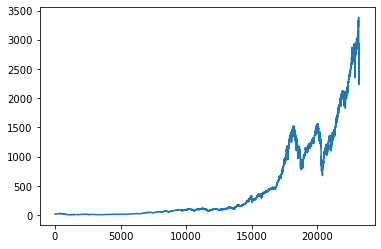

In [22]:
#[3].3

ys= df['Close'].values
pl.plot(ys)

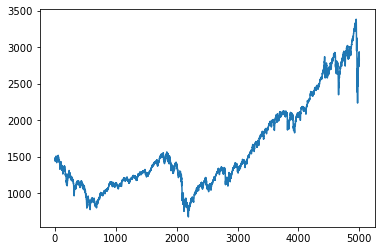

In [23]:
#[3].3
ys= ys[-5000:]
pl.plot(ys)

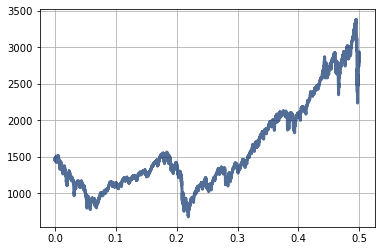

In [24]:
#[3].4
yWave= td.Wave(ys, framerate= 10000)
yWave.plot()

0.00032118267557806565

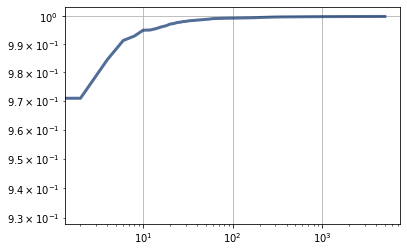

In [25]:
S= yWave.make_spectrum().make_integrated_spectrum()
S.plot_power()
pl.xscale('log')
pl.yscale('log')
S.estimate_slope().slope

In [26]:
# 因為 原訊號之 integrated_spectrum 之 log-log slope= .0003 
# 其值近似於 0，因此 yWave 近似 Brownian Noise